Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/ Реализовать самостоятельно логистическую регрессию Обучить ее методом градиентного спуска Методом nesterov momentum Методом rmsprop

Дополнительное задание * В качестве dataset’а взять Iris, оставив 2 класса: Iris Versicolor Iris Virginica

In [70]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Метод градиентного спуска

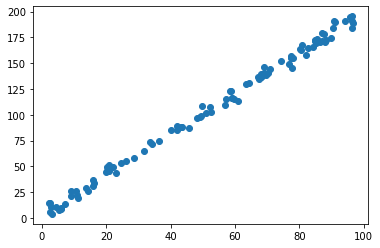

In [71]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

<img src="gradientdescentofmsetable.png"/>

## Применим метод градиентного спуска

In [203]:
EPOCHS = 40
LEARNING_RATE = 0.0001
gamma = 0.9

In [170]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [171]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [172]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

## для применения метода nesterov momentum

vt[i] = nm * vt[i] + lr * np.sum((predictions - y) * x.T[i - 1]) / len(predictions)

w[i] -= vt[i]

In [204]:
theta0 = 0
theta1 = 0
vt0 = 0 # Прменим экспоненциальное бегущее среднее, чтобы накапливать градиент целевой функции нашей сети
vt1 = 0 # Применим экспоненциальное бегущее среднее, чтобы накапливать градиент целевой функции нашей сети
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)

# для применения метода nesterov momentum добавляем еще одно слагаемое - gamma*vt0 и gamma*vt1 соответственно 
# для аккумуляции значений градиента (учёта предыдущих значений)
    vt0 = gamma*vt0 + LEARNING_RATE * dt0
    theta0 = theta0 - vt0
    vt1 = gamma*vt1 + LEARNING_RATE * dt1
    theta1 = theta1 - vt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 0.01061767169581853 t1: 0.7367628020656573 cost: 2977.0678672418526
t0: 0.026923103149957394 t1: 1.8663944468064395 cost: 46.285252633305596
t0: 0.0424167349081456 t1: 2.9353002955781227 cost: 1583.473173416614
t0: 0.0515677791007412 t1: 3.5575168446004746 cost: 4408.316796553909
t0: 0.051743720907168826 t1: 3.549505759054865 cost: 4362.945124084076
t0: 0.04388410114889541 t1: 2.977226446461153 cost: 1729.2340828277995
t0: 0.031797012398658925 t1: 2.106994839324872 cost: 26.75872675690912
t0: 0.020474037518830313 t1: 1.287772944769334 cost: 962.6312130497274
t0: 0.01413978749763103 t1: 0.8149179179855031 cost: 2623.4147674611986
t0: 0.014777920610448324 t1: 0.8272165005631759 cost: 2569.8004750007676
t0: 0.021626582557894337 t1: 1.2716402416653483 cost: 1005.7250439452373
t0: 0.03173136693558839 t1: 1.9419759033721353 cost: 17.256832373510022
t0: 0.0412472274060645 t1: 2.5697753300985164 cost: 586.3534715984886
t0: 0.04693694317766616 t1: 2.929035792435403 cost: 1562.4736113894728


In [174]:
cost_function(X,Y,1,2)

8.551184221764972

In [175]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 40
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
vt0 = 0
vt1 = 0
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)

# для применения метода nesterov momentum добавляем еще одно слагаемое - vt0*gamma и vt1*gamma соответственно

    vt0 = gamma*vt0 + LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[0] = params[0] - vt0
    vt1 = gamma*vt1 + LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] = params[1] - vt1
    
  


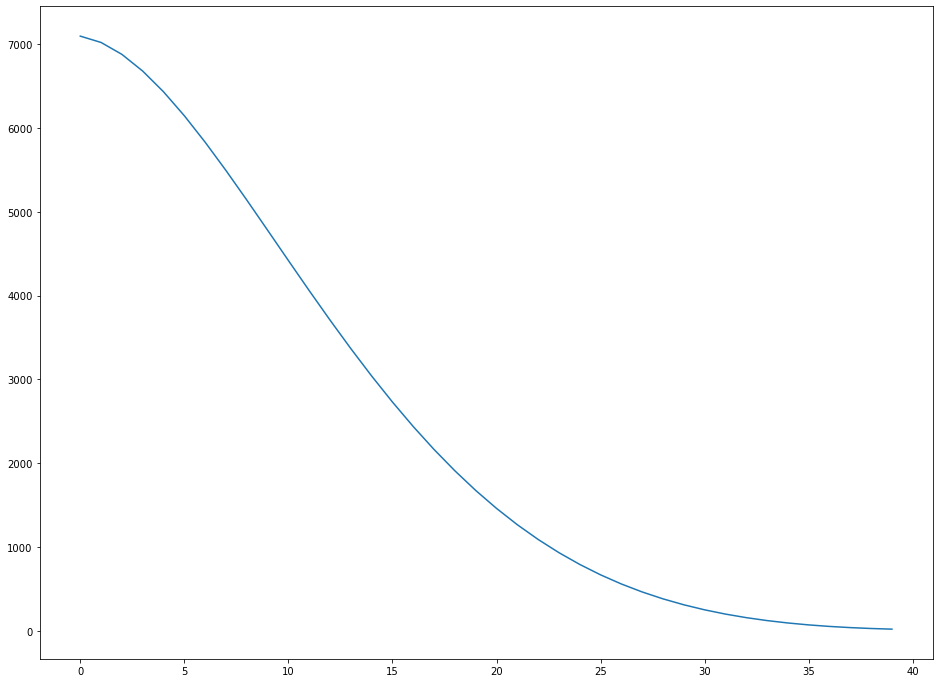

In [176]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

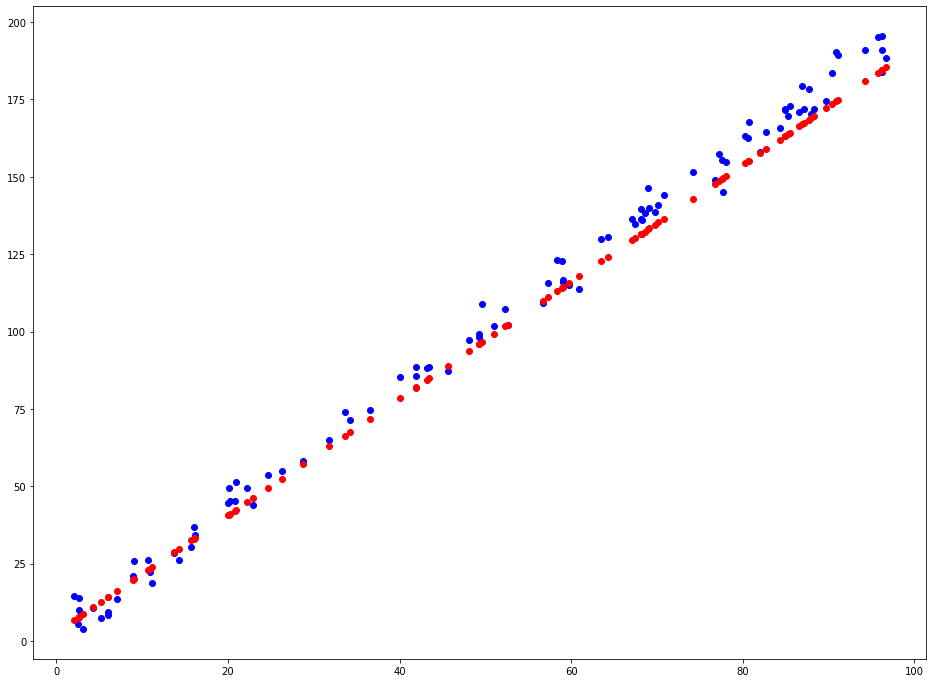

In [177]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[39], color='red')
plt.show()

In [178]:
params


array([2.85347007, 1.90935619])

## для применения метода rmsprop

Eg2[i] = nm * Eg2[i] + (1 - nm) * (np.sum((predictions - y) * x.T[i - 1]) / len(predictions))**2

w[i] -= (lr * (np.sum((predictions - y) * x.T[i - 1]) / len(predictions))) / np.sqrt(Eg2[i] + e)

In [201]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 500
LEARNING_RATE = 0.0001
Eg2_0 = 0 # — бегущее среднее в момент  t для первого параметра
Eg2_1 = 0 # — бегущее среднее в момент  t для второго параметра
costs = []
params = []
preds = []
e = 0.0000001 # эпсилон
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)

# для применения метода rmsprop воспользуемся формулами  
# Eg2[i] = nm * Eg2[i] + (1 - nm) * (np.sum((predictions - y) * x.T[i - 1]) / len(predictions))**2

# w[i] -= (lr * (np.sum((predictions - y) * x.T[i - 1]) / len(predictions))) / np.sqrt(Eg2[i] + e)


    Eg2_0 = gamma*Eg2_0 + (1 - gamma)* (np.sum(predictions - Y) / len(predictions))**2
    params[0] = params[0] - (lr * (np.sum(predictions - Y) / len(predictions))) / np.sqrt(Eg2_0 + e)
    Eg2_1 = gamma*Eg2_1 + (1 - gamma)* (np.sum(predictions - Y) / len(predictions))**2
    params[0] = params[0] - (lr * (np.sum(predictions - Y) / len(predictions))) / np.sqrt(Eg2_1 + e)
 

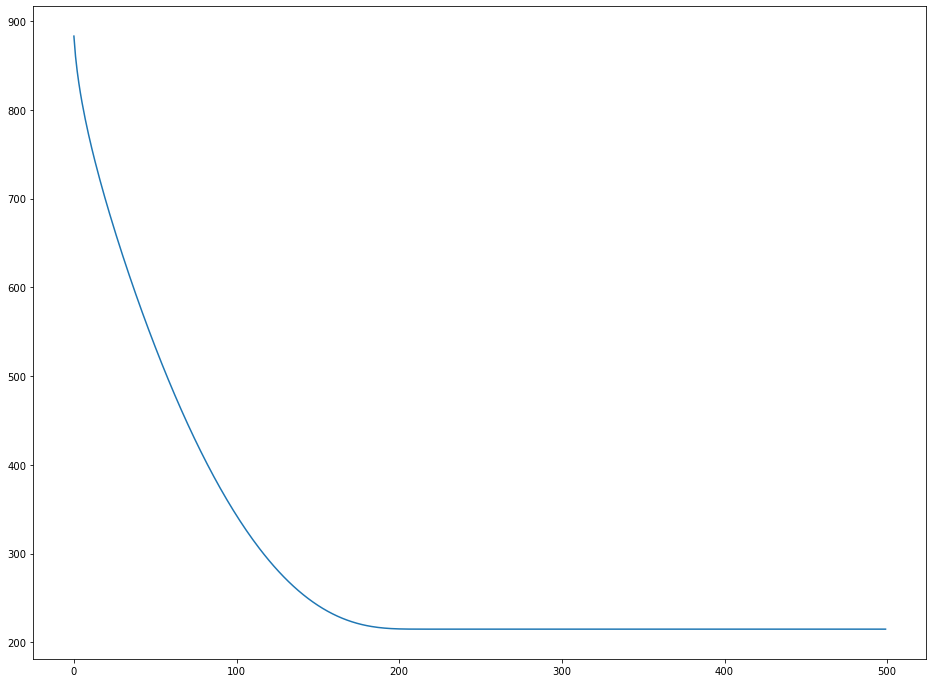

In [197]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

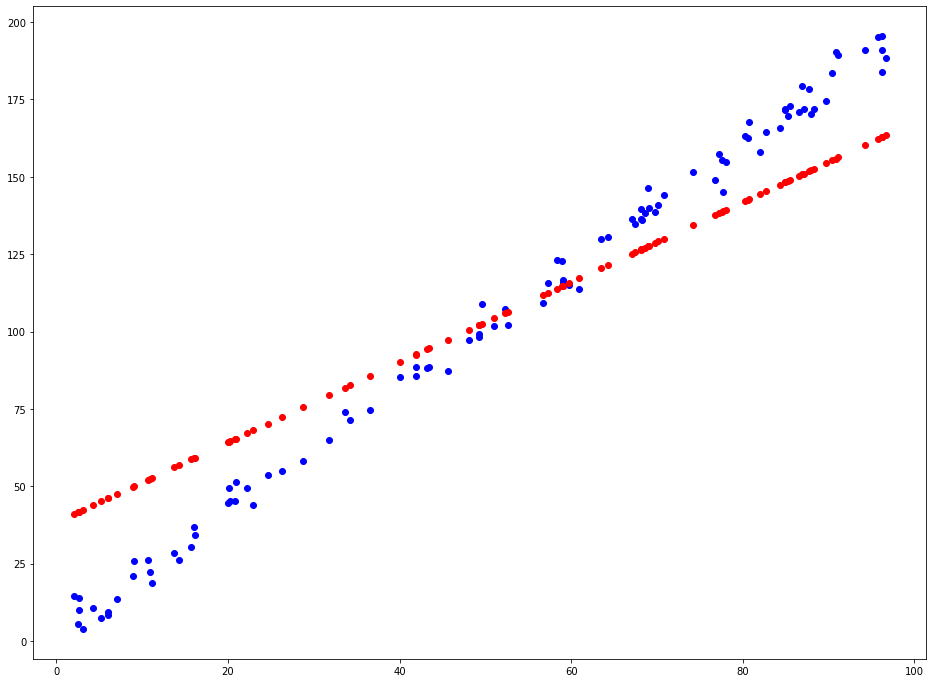

In [198]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[499], color='red')
plt.show()

In [199]:
params

array([38.12307862,  1.29466347])